# Kaggle 
## Ghouls, Goblins, and Ghosts... Boo!

### * decision tree

In [2]:
import pandas as pd
import numpy as np

In [3]:
train_df = pd.read_csv('kaggle data/train.csv')
test_df = pd.read_csv('kaggle data/test.csv')

In [4]:
test_df.tail(10)

,id,bone_length,rotting_flesh,hair_length,has_soul,color
519,885,0.344760,0.760489,0.315305,0.299874,white
520,887,0.497335,0.603658,0.800747,0.711493,blue
521,888,0.650289,0.340660,0.611360,0.499269,white
522,891,0.487516,0.456795,0.691251,0.687419,green
523,892,0.602629,0.732498,0.627519,0.815008,white
524,893,0.377573,0.390158,0.696465,0.355373,blue
525,894,0.229161,0.601265,0.191282,0.475115,clear
526,895,0.510497,0.498347,0.708020,0.714154,white
527,898,0.331472,0.765835,0.338207,0.193431,clear
528,899,0.256789,0.691802,0.415197,0.348971,white


In [5]:
train_df.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_df["color"])
color1 = np.vstack(le.transform(train_df["color"]))
#np.vstack(color)
X0 = train_df.drop(["id",'type','color'], axis=1)
X = pd.DataFrame(np.hstack([X0, color1]),columns=['bone_length','rotting_flesh','hair_length','has_soul','color'])
X.head(10)

,bone_length,rotting_flesh,hair_length,has_soul,color
0,0.354512,0.350839,0.465761,0.781142,3.0
1,0.575560,0.425868,0.531401,0.439899,4.0
2,0.467875,0.354330,0.811616,0.791225,0.0
3,0.776652,0.508723,0.636766,0.884464,0.0
4,0.566117,0.875862,0.418594,0.636438,4.0
5,0.405680,0.253277,0.441420,0.280324,4.0
6,0.399331,0.568952,0.618391,0.467901,5.0
7,0.516224,0.536429,0.612776,0.468048,3.0
8,0.314295,0.671280,0.417267,0.227548,2.0
9,0.280942,0.701457,0.179633,0.141183,5.0


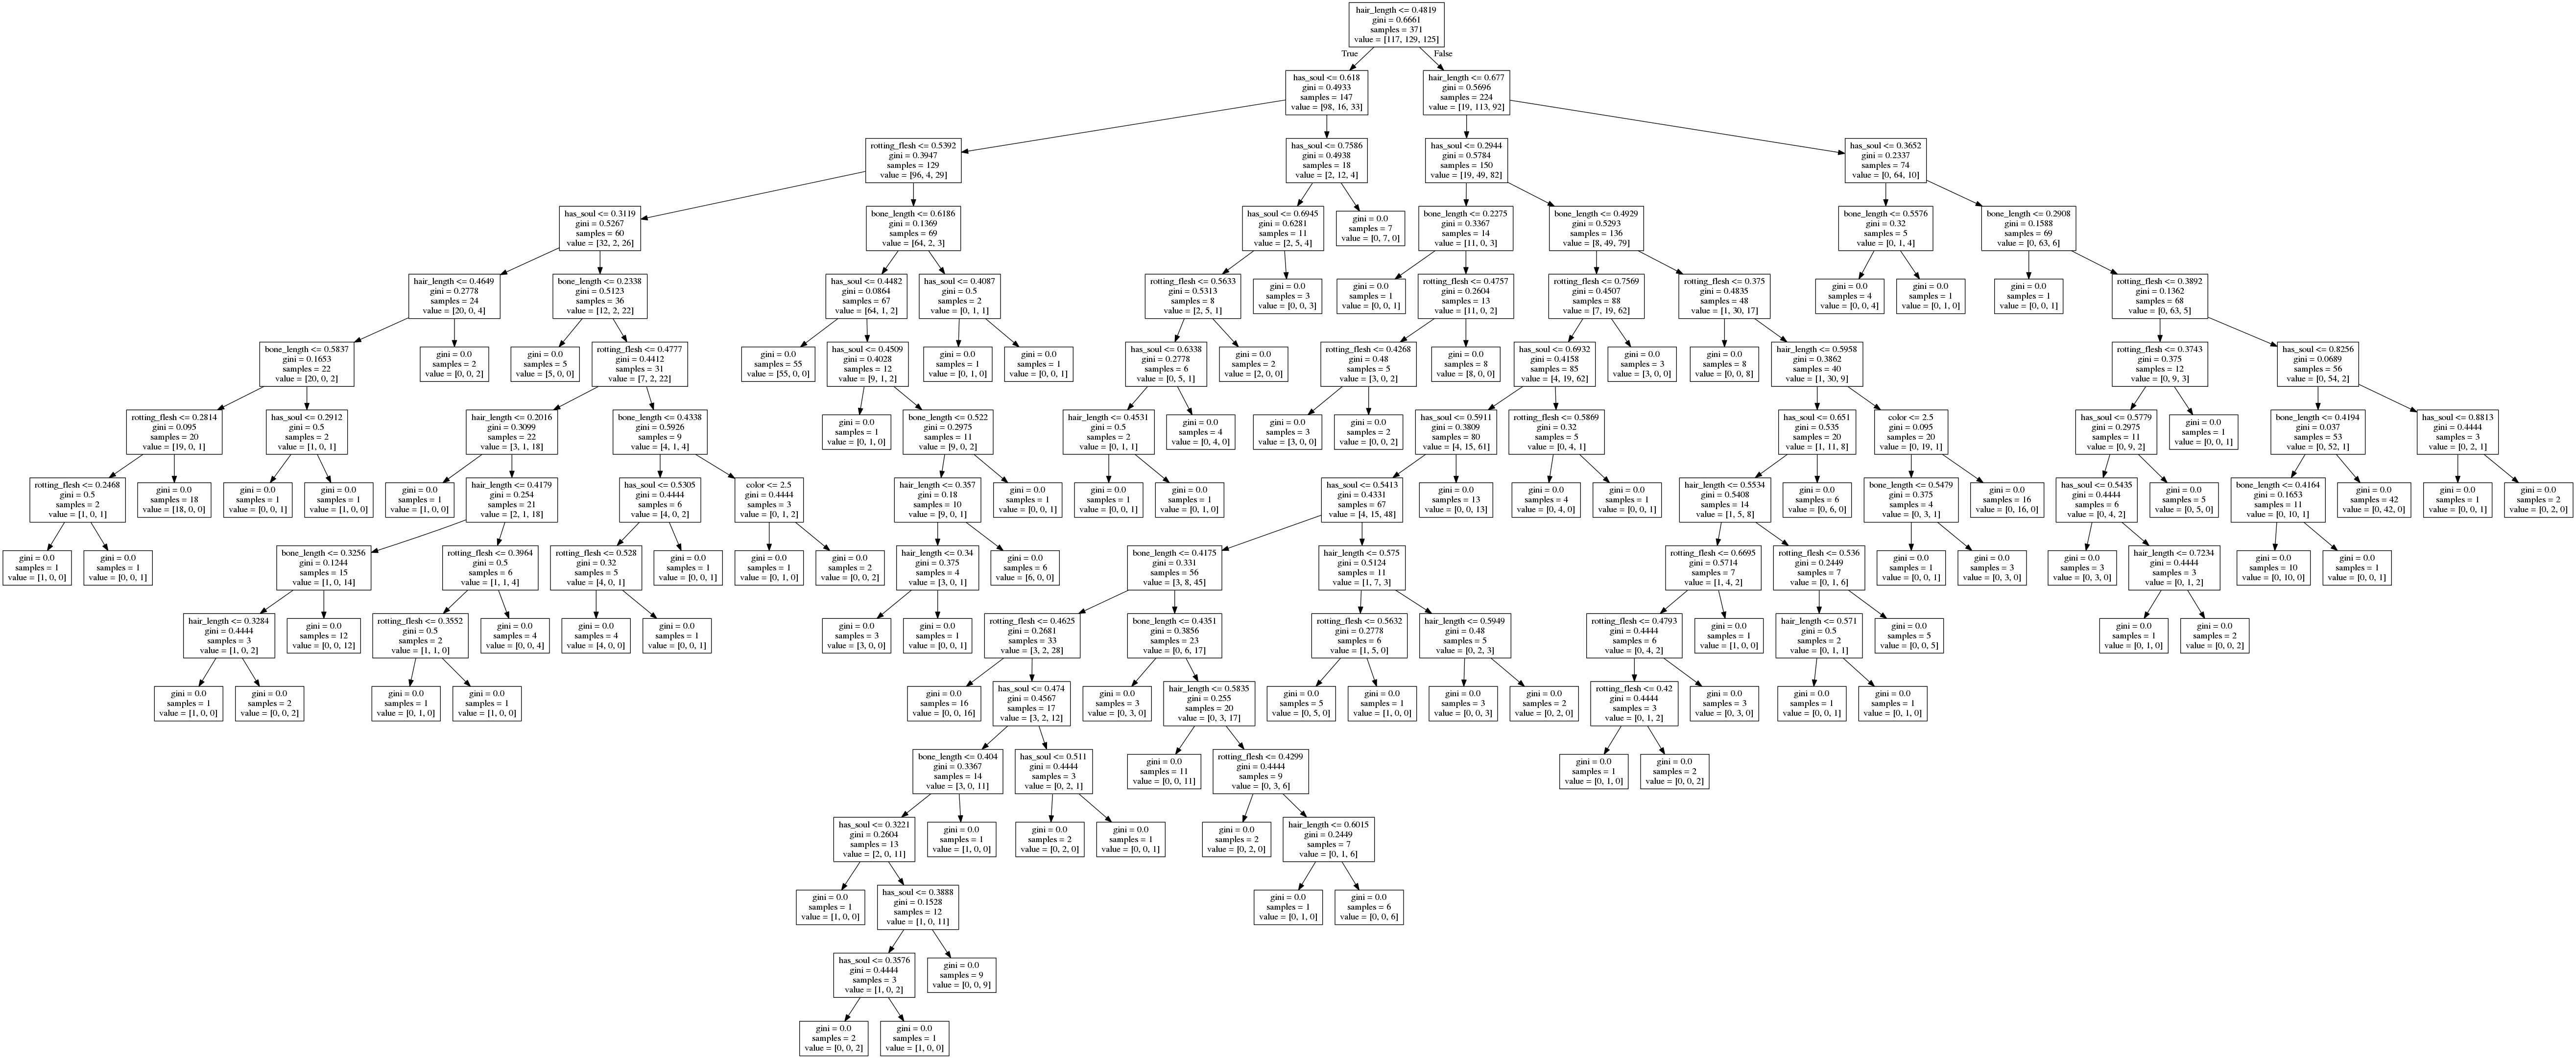

In [123]:
import pydot
import StringIO
from IPython.core.display import Image 
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

y= train_df['type']

model = DecisionTreeClassifier().fit(X, y)
#criterion = gini

command_buf = StringIO.StringIO() 
export_graphviz(model, out_file=command_buf, feature_names=['bone_length','rotting_flesh','hair_length','has_soul','color']) 
graph = pydot.graph_from_dot_data(command_buf.getvalue())[0] 
image = graph.create_png()
image_buf = StringIO.StringIO() 
image_buf.write(image)
Image(image_buf.getvalue())

In [124]:
from sklearn.metrics import classification_report
print(classification_report(y, model.predict(X)))

             precision    recall  f1-score   support

      Ghost       1.00      1.00      1.00       117
      Ghoul       1.00      1.00      1.00       129
     Goblin       1.00      1.00      1.00       125

avg / total       1.00      1.00      1.00       371



In [125]:
test_df.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706087,0.698537,black
1,6,0.427332,0.645024,0.565558,0.451462,white
2,9,0.549602,0.491931,0.660387,0.449809,black
3,10,0.638095,0.682867,0.471409,0.356924,white
4,13,0.361762,0.583997,0.377256,0.276364,black


In [126]:
le = LabelEncoder()
le.fit(test_df["color"])
color_0 = np.vstack(le.transform(test_df["color"]))
#np.vstack(color)
X_0 = test_df.drop(["id",'color'], axis=1)
X_test = pd.DataFrame(np.hstack([X_0, color_0]),columns=['bone_length','rotting_flech','hair_length','has_soul','color'])
X_test.head()

,bone_length,rotting_flech,hair_length,has_soul,color
0,0.471774,0.387937,0.706087,0.698537,0.0
1,0.427332,0.645024,0.565558,0.451462,5.0
2,0.549602,0.491931,0.660387,0.449809,0.0
3,0.638095,0.682867,0.471409,0.356924,5.0
4,0.361762,0.583997,0.377256,0.276364,0.0


In [127]:
predicted_ghost = model.predict(X_test)

In [128]:
print(predicted_ghost)
print(model.score(X_test, predicted_ghost))

['Goblin' 'Ghoul' 'Ghoul' 'Ghoul' 'Ghost' 'Ghost' 'Ghoul' 'Ghoul' 'Goblin'
 'Goblin' 'Ghost' 'Ghoul' 'Goblin' 'Ghost' 'Ghoul' 'Ghost' 'Goblin' 'Ghost'
 'Ghost' 'Ghoul' 'Ghoul' 'Goblin' 'Goblin' 'Goblin' 'Goblin' 'Goblin'
 'Goblin' 'Goblin' 'Ghoul' 'Goblin' 'Goblin' 'Ghoul' 'Ghoul' 'Ghoul'
 'Goblin' 'Ghoul' 'Ghost' 'Goblin' 'Ghost' 'Ghoul' 'Goblin' 'Goblin'
 'Goblin' 'Goblin' 'Goblin' 'Ghoul' 'Ghoul' 'Ghoul' 'Ghoul' 'Goblin'
 'Goblin' 'Goblin' 'Ghost' 'Goblin' 'Goblin' 'Ghost' 'Goblin' 'Goblin'
 'Ghoul' 'Ghost' 'Ghoul' 'Goblin' 'Ghost' 'Ghoul' 'Goblin' 'Ghoul' 'Ghoul'
 'Goblin' 'Ghost' 'Ghoul' 'Goblin' 'Ghost' 'Ghoul' 'Ghoul' 'Goblin'
 'Goblin' 'Goblin' 'Goblin' 'Ghost' 'Ghoul' 'Ghost' 'Ghoul' 'Ghoul' 'Ghoul'
 'Ghost' 'Ghost' 'Ghost' 'Goblin' 'Ghost' 'Ghost' 'Ghost' 'Ghost' 'Ghoul'
 'Goblin' 'Ghost' 'Ghost' 'Ghost' 'Goblin' 'Goblin' 'Ghost' 'Ghoul'
 'Goblin' 'Ghoul' 'Goblin' 'Ghoul' 'Goblin' 'Ghoul' 'Ghoul' 'Ghoul' 'Ghoul'
 'Ghost' 'Goblin' 'Goblin' 'Goblin' 'Ghoul' 'Goblin' 'Ghost' 'Gh

In [129]:
id = test_df['id']

result = pd.DataFrame(predicted_ghost, id, columns = ['type'])
#result.head()

result.to_csv('submission.csv')

In [132]:
train_df = pd.read_csv('kaggle data/train.csv')
test_df = pd.read_csv('kaggle data/test.csv')

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_df["color"])
color1 = np.vstack(le.transform(train_df["color"]))
#np.vstack(color)
X0 = train_df.drop(["id",'type','color'], axis=1)
X = pd.DataFrame(np.hstack([X0, color]),columns=['bone_length','rotting_flesh','hair_length','has_soul','color'])

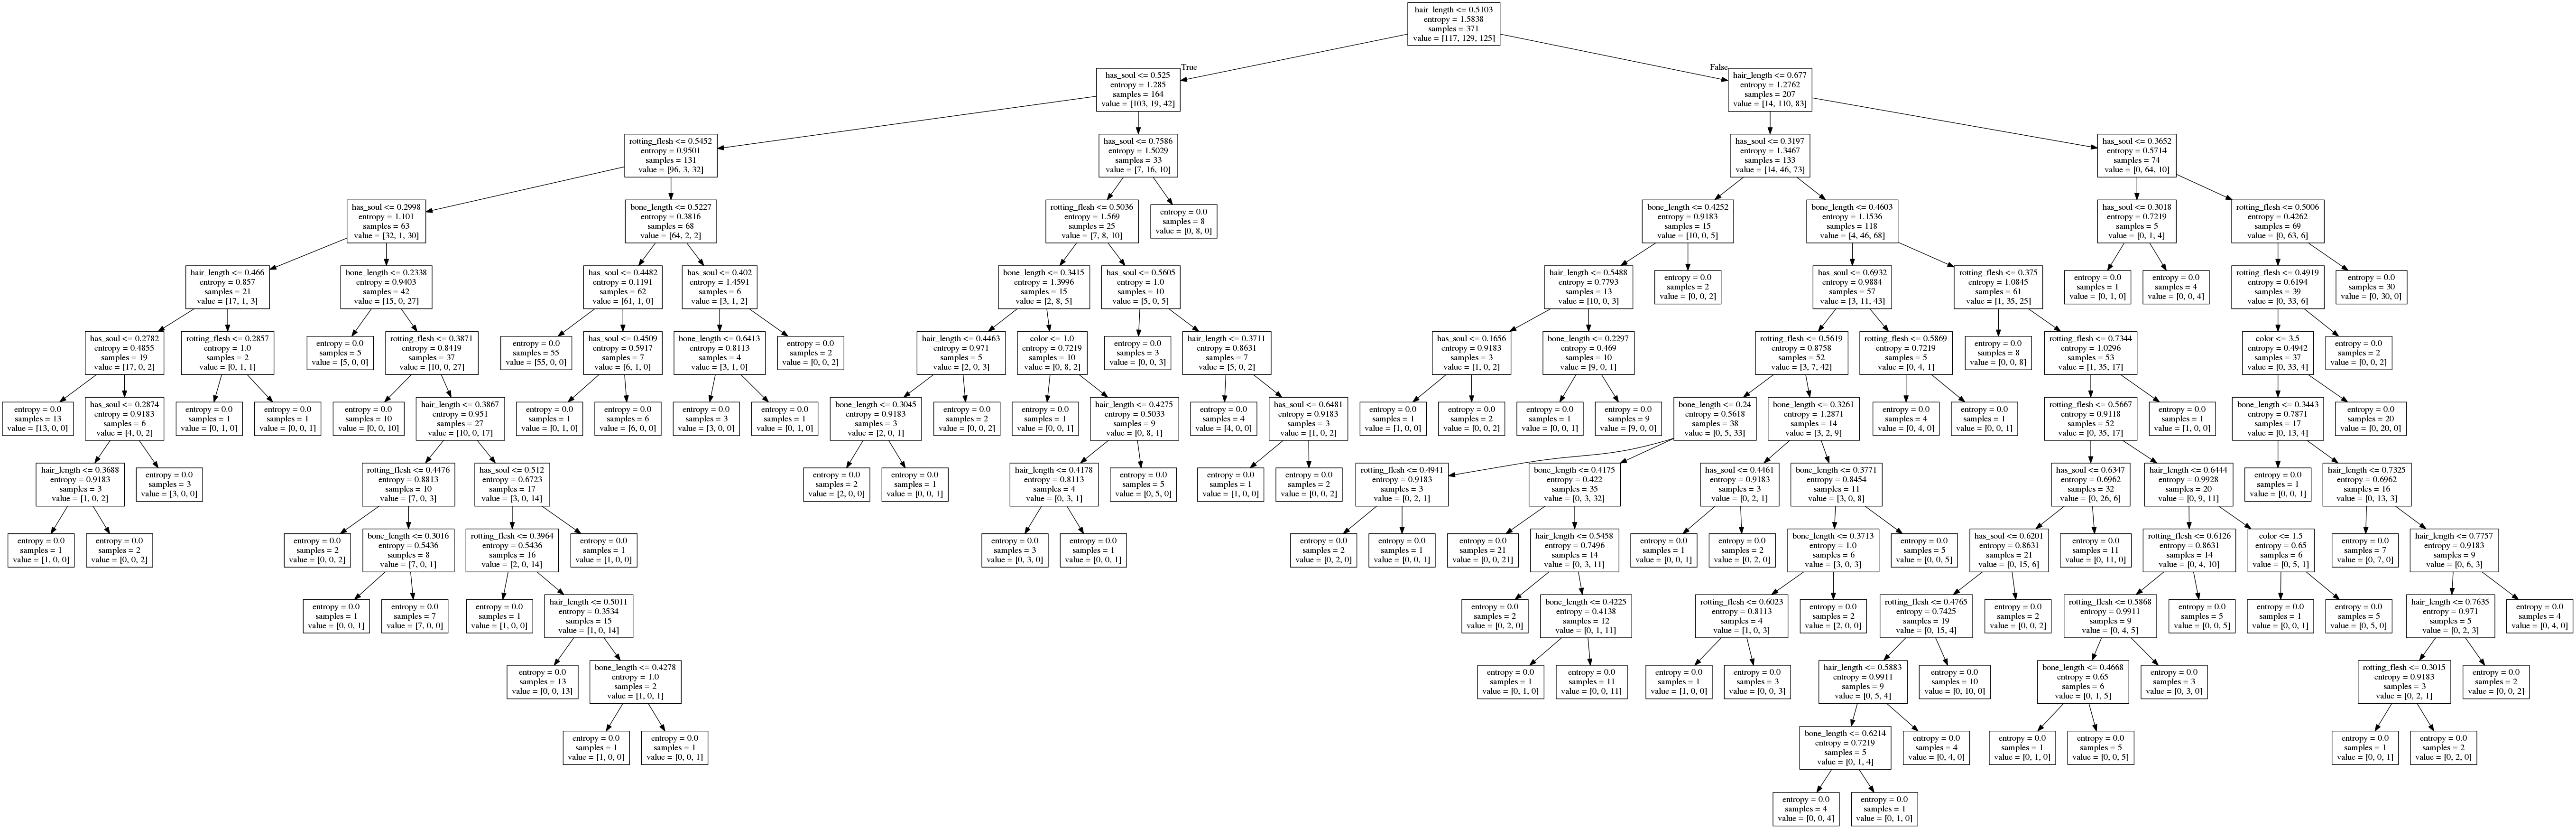

In [133]:
import pydot
import StringIO
from IPython.core.display import Image 
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

y= train_df['type']

model = DecisionTreeClassifier(criterion='entropy').fit(X, y)
#criterion = entropy

command_buf = StringIO.StringIO() 
export_graphviz(model, out_file=command_buf, feature_names=['bone_length','rotting_flesh','hair_length','has_soul','color']) 
graph = pydot.graph_from_dot_data(command_buf.getvalue())[0] 
image = graph.create_png()
image_buf = StringIO.StringIO() 
image_buf.write(image)
Image(image_buf.getvalue())

In [134]:
from sklearn.metrics import classification_report
print(classification_report(y, model.predict(X)))

             precision    recall  f1-score   support

      Ghost       1.00      1.00      1.00       117
      Ghoul       1.00      1.00      1.00       129
     Goblin       1.00      1.00      1.00       125

avg / total       1.00      1.00      1.00       371



In [136]:
le = LabelEncoder()
le.fit(test_df["color"])
color_0 = np.vstack(le.transform(test_df["color"]))
#np.vstack(color)
X_0 = test_df.drop(["id",'color'], axis=1)
X_test = pd.DataFrame(np.hstack([X_0, color_0]),columns=['bone_length','rotting_flech','hair_length','has_soul','color'])

In [137]:
predicted_ghost = model.predict(X_test)

In [138]:
print(predicted_ghost)
print(model.score(X_test, predicted_ghost))

['Ghoul' 'Goblin' 'Ghoul' 'Ghost' 'Ghost' 'Ghost' 'Ghoul' 'Ghoul' 'Goblin'
 'Goblin' 'Ghost' 'Ghoul' 'Goblin' 'Ghost' 'Ghoul' 'Ghost' 'Goblin' 'Ghost'
 'Ghost' 'Ghoul' 'Ghoul' 'Goblin' 'Goblin' 'Goblin' 'Ghoul' 'Goblin'
 'Ghoul' 'Goblin' 'Ghoul' 'Ghoul' 'Ghoul' 'Ghoul' 'Ghoul' 'Goblin' 'Goblin'
 'Ghoul' 'Ghost' 'Goblin' 'Ghost' 'Goblin' 'Goblin' 'Goblin' 'Goblin'
 'Goblin' 'Goblin' 'Goblin' 'Ghoul' 'Goblin' 'Ghoul' 'Goblin' 'Ghoul'
 'Ghost' 'Ghost' 'Goblin' 'Goblin' 'Ghost' 'Goblin' 'Goblin' 'Ghoul'
 'Ghost' 'Ghoul' 'Goblin' 'Ghost' 'Goblin' 'Goblin' 'Goblin' 'Goblin'
 'Ghoul' 'Goblin' 'Ghoul' 'Ghost' 'Goblin' 'Goblin' 'Goblin' 'Goblin'
 'Ghoul' 'Goblin' 'Goblin' 'Ghost' 'Goblin' 'Goblin' 'Goblin' 'Ghoul'
 'Ghoul' 'Ghost' 'Ghost' 'Ghost' 'Goblin' 'Ghost' 'Ghost' 'Ghost' 'Ghost'
 'Goblin' 'Ghost' 'Ghost' 'Ghost' 'Goblin' 'Goblin' 'Goblin' 'Ghost'
 'Ghoul' 'Goblin' 'Goblin' 'Goblin' 'Ghoul' 'Goblin' 'Ghoul' 'Ghoul'
 'Ghoul' 'Ghoul' 'Ghost' 'Goblin' 'Ghost' 'Goblin' 'Ghoul' 'Goblin'
 'Gob

In [139]:
id = test_df['id']

result = pd.DataFrame(predicted_ghost, id, columns = ['type'])
#result.head()

result.to_csv('submission1.csv')